In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from scipy import stats
from sklearn import cluster, datasets, mixture
from scipy.stats import multivariate_normal
#/content/drive/MyDrive/Assignment4/Data.xlsx

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
data1 = pd.read_excel('/content/drive/MyDrive/Assignment4/Data.xlsx')
data1.head()

,Result 1,Result 2
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


-----------------------Answer 2 (a): Data.xlsx ------------------------



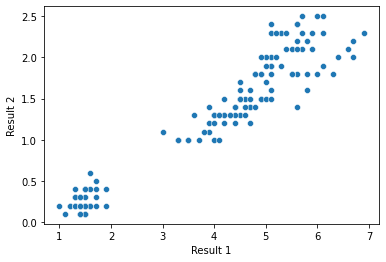

In [40]:
print('-----------------------Answer 2 (a): Data.xlsx ------------------------\n')
sns.scatterplot( x = data1['Result 1'],  y = data1['Result 2'], palette=['b', 'r'])

----------------- Answer 2 (b) : Data.xlsx ----------------------------

Mean Values are as follows:
 [[4.92525253 1.68181818]
 [1.49215686 0.2627451 ]]

Orange line is the line passing from the midpoint of mean and is orthogonal to the line joing the two means



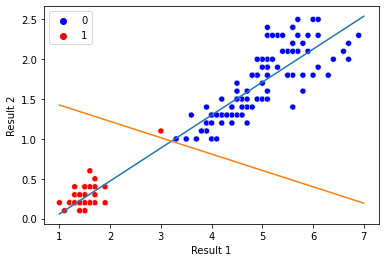

In [41]:
print('----------------- Answer 2 (b) : Data.xlsx ----------------------------\n')
x = np.array(data1.iloc[:, :2])
mean = x[np.random.randint(x.shape[0], size = 2)]
clf_array = np.zeros((x.shape[0],1))

for i in range(500):
  dist1 = np.sqrt(np.sum(np.square((x - mean[0])), axis =1))
  dist2 = np.sqrt(np.sum(np.square((x - mean[1])), axis =1))
  clf_array = np.where(dist1 < dist2 , 1, 0)
  mean[0] = np.mean(x[clf_array == 0], axis = 0)
  mean[1] = np.mean(x[clf_array == 1], axis = 0)

sns.scatterplot( x = data1['Result 1'],  y = data1['Result 2'], hue = clf_array, palette=['b', 'r'])
x = np.linspace(1, 7, 500)
y = (mean[1][1] - mean[0][1])/(mean[1][0] - mean[0][0])*(x - mean[0][0]) + mean[0][1]
plt.plot(x, y)
x = np.linspace(1, 7, 500)
y = (-1/(mean[1][1] - mean[0][1])/(mean[1][0] - mean[0][0]))*(x - (mean[0][0] + mean[1][0])/2) + (mean[0][1] + mean[1][1])/2
plt.plot(x, y)


print('Mean Values are as follows:\n' , mean)
print('\nOrange line is the line passing from the midpoint of mean and is orthogonal to the line joing the two means\n')

In [42]:
data2 = pd.read_excel('/content/drive/MyDrive/Assignment4/Data_GMM.xlsx')
data2.head()

,Result 1,Result 2
0,1.790702,0.756250
1,1.287721,0.102399
2,1.003226,0.207663
3,1.365617,0.047025
4,4.526678,1.353905


-----------------------Answer 2 (c): Data_GMM.xlsx ------------------------



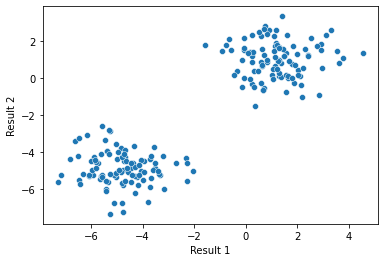

In [43]:
print('-----------------------Answer 2 (c): Data_GMM.xlsx ------------------------\n')
sns.scatterplot( x = data2['Result 1'],  y = data2['Result 2'], palette=['b', 'r'])

----------------- Answer 2 (d) : Data_GMM.xlsx ----------------------------



<Figure size 288x288 with 0 Axes>

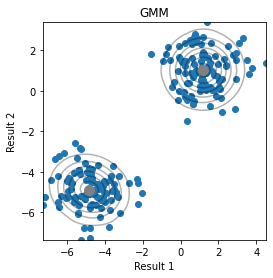

In [44]:
print('----------------- Answer 2 (d) : Data_GMM.xlsx ----------------------------\n')
x = data2.iloc[:,[0,1]].values
def GMM(X,k,iterations):
    reg_cov = 1e-6*np.identity(len(X[0]))
    x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
    XY = np.array([x.flatten(),y.flatten()]).T
    mu = np.random.randint(min(X[:,0]),max(X[:,0]),size=(k,len(X[0])))
    cov = np.zeros((k,len(X[0]),len(X[0])))
    for dim in range(len(cov)):
        np.fill_diagonal(cov[dim],5)
    pi = np.ones(k)/k
    log_likelihoods = []
    fig = plt.figure(figsize=(4,4))
  
    for m,c in zip(mu,cov):
        c += reg_cov
        multi_normal = multivariate_normal(mean=m,cov=c)
    for i in range(iterations):
        #E_step
        r_ic = np.zeros((len(X),len(cov)))
        for m,co,p,r in zip(mu,cov,pi,range(len(r_ic[0]))):
            co+=reg_cov
            mn = multivariate_normal(mean=m,cov=co)
            lis1 = []
            for a,b,c in zip(pi,mu,cov+reg_cov):
              lis1.append(a*multivariate_normal(mean=b,cov=c).pdf(X))
            r_ic[:,r] = p*mn.pdf(X)/np.sum(lis1 ,axis=0)
        mu = []
        cov = []
        pi = []
        log_likelihood = []
        #M_Step
        for c in range(len(r_ic[0])):
            m_c = np.sum(r_ic[:,c],axis=0)
            mu_c = (1/m_c)*np.sum(X*r_ic[:,c].reshape(len(X),1),axis=0)
            mu.append(mu_c)
            p = (np.array(r_ic[:,c]).reshape(len(X),1)*(X-mu_c)).T
            q = (X-mu_c)
            a = ((1/m_c)*np.dot(p,q))
            c = reg_cov
            cov.append(a+c)
            pi.append(m_c/np.sum(r_ic))

        lis = []

        for a, b, c in zip(pi,range(len(mu)),range(len(cov))):
          lis.append(a*multivariate_normal(mu[b],cov[c]).pdf(X))

    fig3 = plt.figure(figsize=(4,4))
    ax2 = fig3.add_subplot(111)
    ax2.scatter(X[:,0],X[:,1])
    for m,c in zip(mu,cov):
        multi_normal = multivariate_normal(mean=m,cov=c)
        a = np.sort(X[:,0])
        b = np.sort(X[:,1])
        c = multi_normal.pdf(XY).reshape(len(X),len(X))
        ax2.contour(a,b,c,colors='black',alpha=0.3)
        ax2.scatter(m[0],m[1],c='grey',zorder=10,s=100)
        ax2.set_title('GMM')
        ax2.set_xlabel('Result 1')
        ax2.set_ylabel('Result 2')
    return mu,cov

mu,cov = GMM(x,2,8)
    